In [73]:
import pandas as pd
df = pd.read_csv("/Users/carriemagee/Personal_Project/Goodreads_Personal_Project/goodreads_library_export_8_15.csv")

In [18]:
print(df.columns)
list(df.columns)
df.describe

Index(['Book Id', 'Genre', 'Title', 'Author', 'Author l-f',
       'Additional Authors', 'ISBN', 'ISBN13', 'My Rating', 'Average Rating',
       'Publisher', 'Binding', 'Number of Pages', 'Year Published',
       'Original Publication Year', 'Date Read', 'Date Added', 'Bookshelves',
       'Bookshelves with positions', 'Exclusive Shelf', 'My Review', 'Spoiler',
       'Private Notes', 'Read Count', 'Owned Copies'],
      dtype='object')


<bound method NDFrame.describe of       Book Id      Genre                                              Title  \
0    62292422  Mythology                                    Psyche and Eros   
1    41104077  Mythology                               Girl, Goddess, Queen   
2    50607466    Fantasy              Queen of Shadows (Throne of Glass #4)   
3    63057457  Mythology                                          Mythology   
4    61756732  Mythology                           The Silence of the Girls   
..        ...        ...                                                ...   
120  59344312        NaN              Powerless (The Powerless Trilogy, #1)   
121  50659467        NaN  The Serpent and the Wings of Night (Crowns of ...   
122  60393672        NaN                              Same Time Next Summer   
123  50659468        NaN         The Cruel Prince (The Folk of the Air, #1)   
124      6708        NaN                                Carrie Soto Is Back   

                 

In [74]:
#Filtering dataset to only include books that I have read
read_books = df[df['Date Read'].notnull()]
data = read_books.loc[:, ['Book Id','Genre','Title','Author','My Rating','Average Rating',
                          'Number of Pages','Year Published','Original Publication Year',
                          'Date Read','Date Added','Bookshelves', 'My Review']]


In [75]:
#checking if there are null values in year published
print(data["Year Published"].isnull)
# Assuming df is your DataFrame
null_rows = df[df.isnull().any(axis=1)]

<bound method Series.isnull of 0     2023
1     2024
2     2023
4     2019
5     2023
6     2023
7     2023
8     2023
9     2023
10    2022
11    2022
12    2024
13    2018
14    2021
15    2012
16    2023
17    2024
18    2021
19    2022
20    2021
21    2021
22    2020
24    2022
25    2018
26    2014
27    2020
29    2020
30    2018
31    2022
32    2024
33    2023
34    2023
35    2022
36    2021
37    2023
39    2023
40    2023
41    2020
42    2022
43    2019
44    2023
45    2022
46    2023
47    2023
48    2020
49    2021
50    2020
53    2020
55    2020
Name: Year Published, dtype: int64>


In [76]:
#changing data types
import numpy as np
print(data.dtypes)
data = data[np.isfinite(data['Original Publication Year'])] 
convert_dtypes = {"Book Id": int, "Title": str, "Genre":object, 
                  "Author": str, "My Rating": float,
                  "Average Rating": float, "Number of Pages": int,
                  "Year Published": int, "Original Publication Year": int,
                  "Date Read" : object, "Date Added" : object,
                  "Bookshelves":object, "My Review":object}

df = data.astype(convert_dtypes)
print(df.dtypes)

Book Id                        int64
Genre                         object
Title                         object
Author                        object
My Rating                      int64
Average Rating               float64
Number of Pages                int64
Year Published                 int64
Original Publication Year      int64
Date Read                     object
Date Added                    object
Bookshelves                   object
My Review                     object
dtype: object
Book Id                        int64
Genre                         object
Title                         object
Author                        object
My Rating                    float64
Average Rating               float64
Number of Pages                int64
Year Published                 int64
Original Publication Year      int64
Date Read                     object
Date Added                    object
Bookshelves                   object
My Review                     object
dtype: object


In [77]:
#inserting new row of data

new_row = {'Book Id': 60714999, 'Genre': 'Fantasy', 'Title': "The Serpent and the Wings of Night (Crowns of Nyaxia, #1)", "Author":"Carissa Broadbent","My Rating": 4.75,"Average Rating":4.32, "Number of Pages":504,
            "Year Published":2022, "Original Publication Year":2022, "Date Read":8/16/24, "Date Added":2/28/24 ,"My Review": "4.75 — having an internal battle along with Oraya after that ending. What the fuck. One of the craziest book endings ever (even though it was giving very much FBBA ending) I guess my new fav trope is the lover betrayal to forced marriage? Actually the more I think about it this series was like Ash/Sera and Cas/Poppy all in one but obviously don’t hate that but I think that’s why I’m giving it 4.75 stars. Like it’s been done before. <br/><br/>I loved the first scene of her as a child very descriptive and also felt comforted by the use of little serpent kinda was ASMR like for my mentally ill self. Then when she went back and describe herself as a “serpent defending her nest”. unfortunately girlie had some full circle moments not in a good way. <br/><br/>Also please don’t acknowledge how fast I read this. I am ashamed and feel disconnected from reality. <br/><br/>TTPD — My Boy Only Breaks His Favorite Toys; The Albatross; I Can Do It With a Broken Heart; Fortnight tbh so many more"  }
df = df._append(new_row, ignore_index = True)

df = df.drop_duplicates(subset=["Title"], keep=False)

display(df)


,Book Id,Genre,Title,Author,My Rating,Average Rating,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,My Review
0,62292422,Mythology,Psyche and Eros,Luna McNamara,4.00,3.78,352,2023,2023,8/13/24,8/10/24,"greek-myth, physical-tbr",4 stars — Greek Mythology retelling meets YA r...
1,41104077,Mythology,"Girl, Goddess, Queen",Bea Fitzgerald,3.00,4.03,496,2024,2023,8/10/24,6/24/24,greek-myth,3.5 — Cute but mundane. Not too much detail. I...
2,50607466,Fantasy,Queen of Shadows (Throne of Glass #4),Sarah J. Maas,5.00,4.61,672,2023,2015,8/6/24,8/3/24,NaN,6/5 stars — Impeccable. I understand why we ne...
3,61756732,Mythology,The Silence of the Girls,Pat Barker,3.00,3.90,325,2019,2018,8/1/24,5/27/24,"greek-myth, physical-tbr",Challengers but make it Greek mythology.
4,23522,Fantasy,"Heir of Fire (Throne of Glass, #3)",Sarah J. Maas,4.00,4.46,576,2023,2014,7/30/24,6/5/24,NaN,4.25/5 — My brain doesn’t know what to think. ...
5,29981261,Fantasy,"The Assassin's Blade (Throne of Glass, #0.1-0.5)",Sarah J. Maas,4.00,4.22,451,2023,2014,7/27/24,7/24/24,NaN,4 stars —
6,55440232,Fantasy,Crown of Midnight (Throne of Glass #2),Sarah J. Maas,4.00,4.36,418,2023,2013,7/22/24,4/22/24,NaN,4.25 — WOOAAHHHHHHHHHHH <br/><br/>I missed SJM...
7,59427493,Fantasy,"A Fire in the Flesh (Flesh and Fire, #3)",Jennifer L. Armentrout,5.00,4.10,632,2023,2023,7/20/24,7/2/24,NaN,4.5 — I had a serious manic episode reading th...
8,54985743,Fantasy,"A Soul of Ash and Blood (Blood and Ash, #5)",Jennifer L. Armentrout,3.00,3.92,703,2023,2023,7/17/24,6/28/24,NaN,3.0 — hey guys so what the fuck was that? That...
9,40132775,Fantasy,"A Light in the Flame (Flesh and Fire, #2)",Jennifer L. Armentrout,5.00,4.51,615,2022,2022,7/13/24,7/2/24,NaN,5 stars — Spectacular give me 14 of em right n...


In [78]:
#changing Dates to datetime 
df['Date Read'] = pd.to_datetime(df['Date Read'])
df['Date Added'] = pd.to_datetime(df['Date Added'])

/var/folders/1k/yhxt4d4n5md9y3hcv07csy280000gn/T/ipykernel_98728/3800608512.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Read'] = pd.to_datetime(df['Date Read'])
/var/folders/1k/yhxt4d4n5md9y3hcv07csy280000gn/T/ipykernel_98728/3800608512.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Added'] = pd.to_datetime(df['Date Added'])


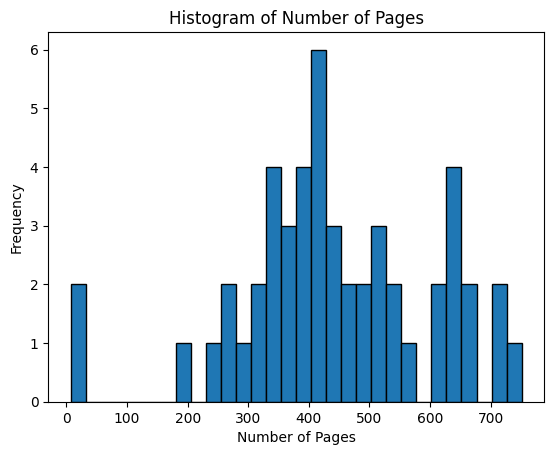

/var/folders/1k/yhxt4d4n5md9y3hcv07csy280000gn/T/ipykernel_98728/2427105938.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average Rating'])


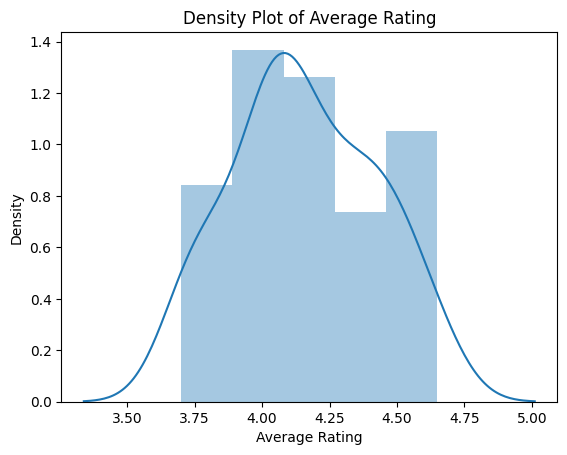

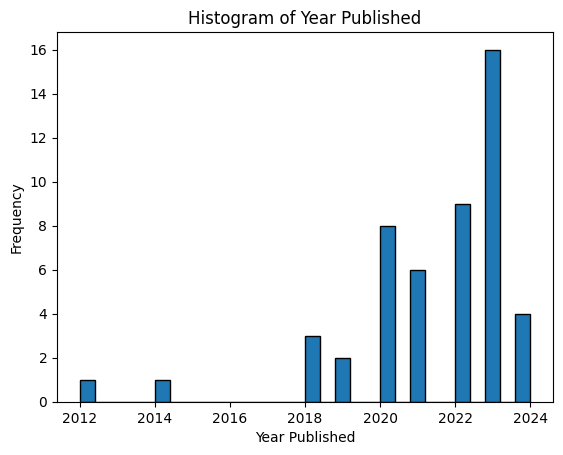

In [79]:
#CHECKING DISTRIBUTION OF FEATURES
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['Number of Pages'], bins=30, edgecolor='black')
plt.title('Histogram of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

sns.distplot(df['Average Rating'])
plt.title('Density Plot of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.show()

plt.hist(df['Year Published'], bins=30, edgecolor='black')
plt.title('Histogram of Year Published')
plt.xlabel('Year Published')
plt.ylabel('Frequency')
plt.show()





In [80]:
#fixing outliers in dataset
# Condition to identify the specific row(s)
condition = df['Author'] == 'Jennette McCurdy'
condition2 = df['Author'] == 'Casey McQuiston'

# Update Number of pages
df.loc[condition, 'Number of Pages'] = 320
df.loc[condition2, 'Number of Pages'] = 421
print(df.loc[condition2])

     Book Id    Genre                    Title           Author  My Rating  \
39  53138081  Romance  Red, White & Royal Blue  Casey McQuiston        3.0   

    Average Rating  Number of Pages  Year Published  \
39            4.08              421            2019   

    Original Publication Year  Date Read Date Added Bookshelves  \
39                       2019 2024-03-26 2024-03-22         NaN   

                                            My Review  
39  I’ve been wanting to read this book after watc...  


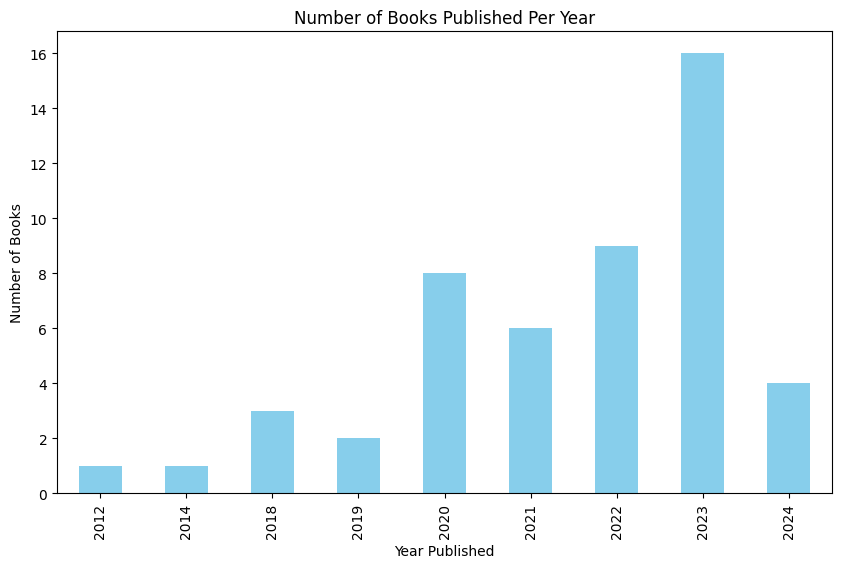

In [81]:
import matplotlib.pyplot as plt
books_per_year = df.groupby('Year Published').size()
# Plotting
plt.figure(figsize=(10, 6))
books_per_year.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Number of Books Published Per Year')
plt.xlabel('Year Published')
plt.ylabel('Number of Books')

# Show the plot
plt.show()

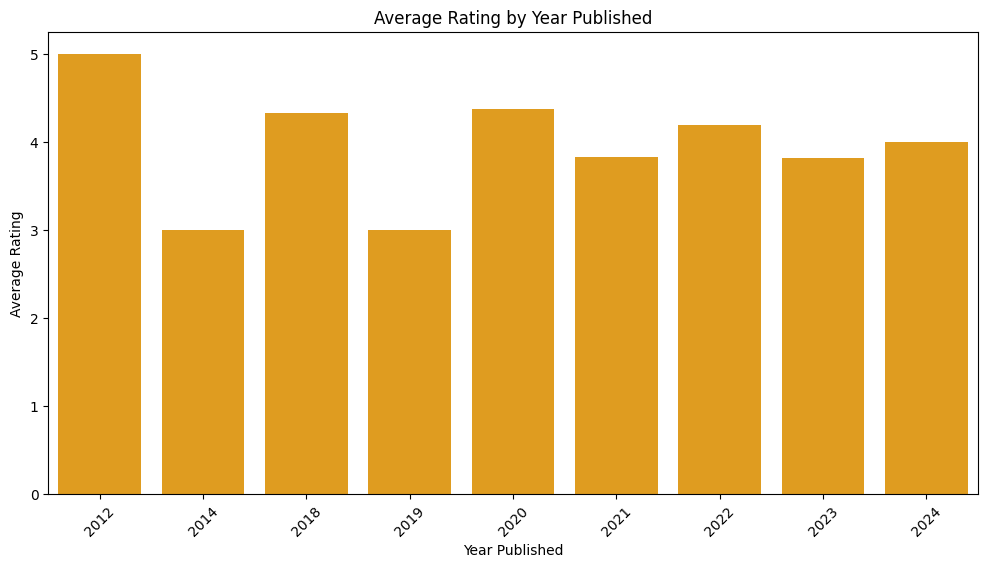

In [82]:
#Bar plot for avg My Rating per year
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average rating per year
avg_rating_per_year = df.groupby('Year Published')['My Rating'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year Published', y='My Rating', data=avg_rating_per_year, color="orange")

# Adding titles and labels
plt.title('Average Rating by Year Published')
plt.xlabel('Year Published')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability

# Show the plot
plt.show()

                 Average Rating  Number of Pages  My Rating
Average Rating         1.000000         0.542451   0.589910
Number of Pages        0.542451         1.000000   0.328217
My Rating              0.589910         0.328217   1.000000


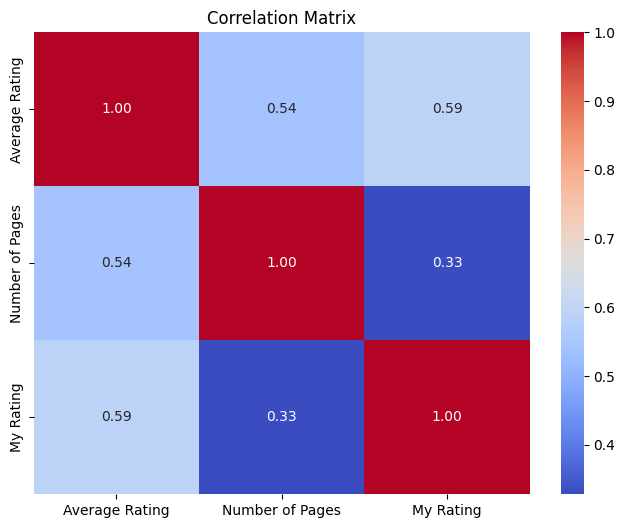

In [83]:
# Calculate the correlation matrix
corr_matrix = df[['Average Rating', 'Number of Pages', 'My Rating']].corr()
print(corr_matrix)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [84]:
#performing a Pearson Correlation Hypothesis Test bw Avg Rating and My Rating
import scipy.stats as stats

corr, p_value = stats.pearsonr(df['Average Rating'], df['My Rating'])
print(f'Pearson Correlation: {corr}')
print(f'p-value: {p_value}')

Pearson Correlation: 0.5899097335834984
p-value: 6.535779243622545e-06


In [49]:
#performing a Pearson Correlation Hypothesis Test bw # Pages and My Rating
corr, p_value = stats.pearsonr(df['Number of Pages'], df['My Rating'])
print(f'Pearson Correlation: {corr}')
print(f'p-value: {p_value}')

Pearson Correlation: 0.3282172373767364
p-value: 0.019964265720528417


In [85]:
#Normalized my rating by author and adde new column for EDA
df['Avg Rating by Author'] = df.groupby('Author')['My Rating'].transform('mean')

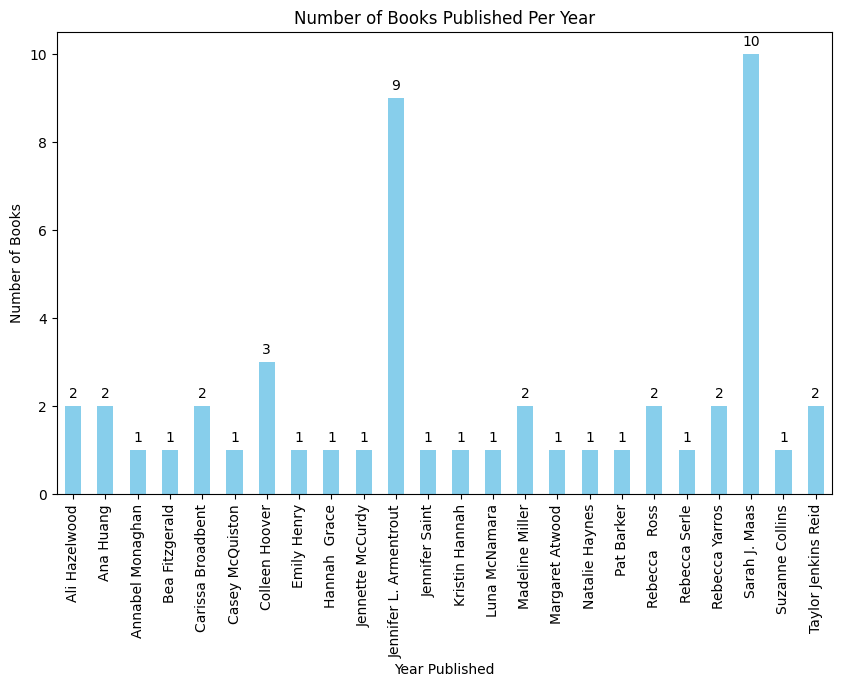

In [86]:
import matplotlib.pyplot as plt
books_per_author = df.groupby('Author').size()
# Plotting
plt.figure(figsize=(10, 6))
ax = books_per_author.plot(kind='bar', color='skyblue')


# Adding titles and labels
plt.title('Number of Books Published Per Year')
plt.xlabel('Year Published')
plt.ylabel('Number of Books')

# Add labels on top of the bars
for i, v in enumerate(books_per_author):
    ax.text(i, v + 0.2, str(v), color='black', ha='center')
# Show the plot
plt.show()

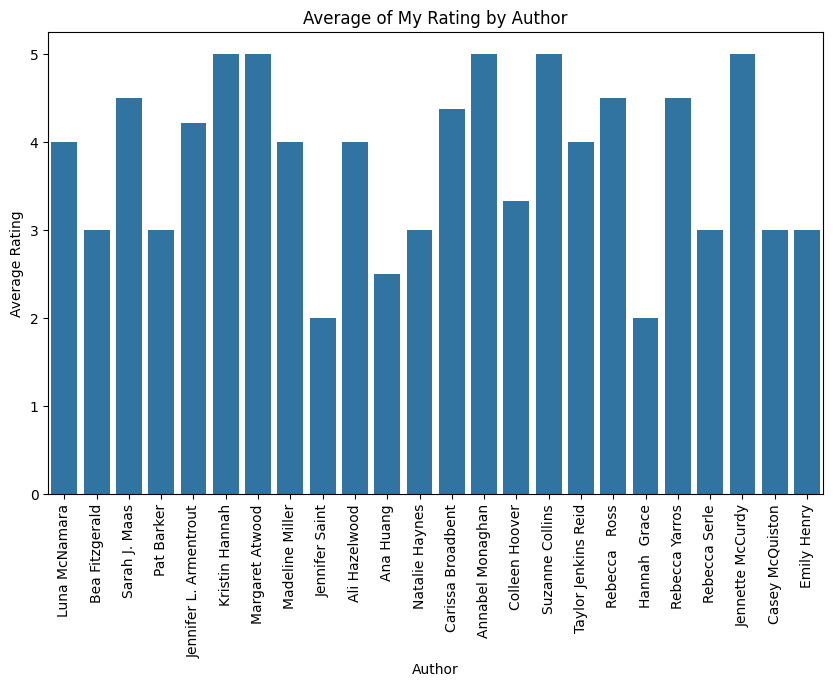

In [87]:

plt.figure(figsize=(10,6))
sns.barplot(x = df["Author"], y = df["Avg Rating by Author"])

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)
plt.title('Average of My Rating by Author')
plt.xlabel('Author')
plt.ylabel('Average Rating')

# Show the plot
plt.show()

In [88]:
#Filtered to look at authors where I have read more than 1 book beacuse it is better for ANOVA
from scipy.stats import f_oneway
# Filter out authors with only one book read
authors_with_multiple_books = df['Author'].value_counts()[df['Author'].value_counts() > 1].index
df_filtered = df[df['Author'].isin(authors_with_multiple_books)]

# Now perform ANOVA or other analyses on this filtered dataset
# Instead of using Avg Rating by Author, use the raw 'My Rating' for ANOVA
ratings_by_author = [df_filtered[df_filtered['Author'] == author]['My Rating'] for author in df_filtered['Author'].unique()]
f_stat, p_value = f_oneway(*ratings_by_author)
print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')
print("With a p-value of approximately 0.1526, you would fail to reject the null hypothesis, which in this context means you do not have sufficient evidence to say that the mean ratings differ across authors" 
      "The differences in ratings might just be due to random variation rather than a true difference in how you rate books by different authors.")


F-statistic: 1.6510975524230311
p-value: 0.1526124023885782
With a p-value of approximately 0.1526, you would fail to reject the null hypothesis, which in this context means you do not have sufficient evidence to say that the mean ratings differ across authorsThe differences in ratings might just be due to random variation rather than a true difference in how you rate books by different authors.


MODELING

In [90]:
#OHE may not be best option because data is sparse and would lead to high dimensonitlty 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# One-hot encode the 'Author' column
df_OHE = pd.get_dummies(df, columns=['Author'], drop_first = True)


In [92]:
#OHE may not be best option because data is sparse and would lead to high dimensonitlty 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# One-hot encode the 'Author' column
df = pd.get_dummies(df, columns=['Genre'], drop_first = True)
print(df.columns)

Index(['Book Id', 'Title', 'Author', 'My Rating', 'Average Rating',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'My Review',
       'Avg Rating by Author', 'Genre_Dystopian', 'Genre_Fantasy',
       'Genre_Historical Fiction', 'Genre_Mythology', 'Genre_Romance'],
      dtype='object')


In [93]:
#Opting to do frequency encoding to reduce dimension but keep some of the importance
# Calculate the frequency of each author
author_frequencies = df['Author'].value_counts()
#print(author_frequencies)
# Map the frequencies back to the 'Author' column
df['Author_Freq_Encoded'] = df['Author'].map(author_frequencies)
# Display the DataFrame with Frequency Encoding
print(df.head())

    Book Id                                  Title          Author  My Rating  \
0  62292422                        Psyche and Eros   Luna McNamara        4.0   
1  41104077                   Girl, Goddess, Queen  Bea Fitzgerald        3.0   
2  50607466  Queen of Shadows (Throne of Glass #4)   Sarah J. Maas        5.0   
3  61756732               The Silence of the Girls      Pat Barker        3.0   
4     23522     Heir of Fire (Throne of Glass, #3)   Sarah J. Maas        4.0   

   Average Rating  Number of Pages  Year Published  Original Publication Year  \
0            3.78              352            2023                       2023   
1            4.03              496            2024                       2023   
2            4.61              672            2023                       2015   
3            3.90              325            2019                       2018   
4            4.46              576            2023                       2014   

   Date Read Date Added   

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Split Data into Features (X) and Target (y)
#X = df.loc[:, ["Average Rating","Number of Pages", "Year Published","Genre_Dystopian","Genre_Fantasy","Genre_Historical Fiction","Genre_Mythology",'Genre_Romance']]
X = df.loc[:, ["Average Rating","Number of Pages", "Year Published"]] #including the genres makes the model too complex and high dimensional 
y = df["My Rating"]

# List of columns to convert from T/F to 0/1
#columns_to_convert = ["Genre_Dystopian", "Genre_Fantasy", "Genre_Historical Fiction", "Genre_Mythology", "Genre_Romance"]
# Convert the specified columns from True/False to 0/1
#X[columns_to_convert] = X[columns_to_convert].astype(int)
#print(X[columns_to_convert].head())

#Split Data into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [113]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant column for the intercept
X_train_const = sm.add_constant(X_train)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_const.values, i+1) for i in range(X_train_const.shape[1]-1)]

print(vif)
#Dystopian only has one book in it so its makes it perfectly collinear with the intercept term


           Feature       VIF
0   Average Rating  1.293195
1  Number of Pages  1.293195


In [114]:
#SCALING DATA AND TRYING AGAIN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Initalize and train model
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_) #getting the weights/coefs 
print("lf.intercept_:", lr.intercept_) #getting slope/intercept

lr.coef_: [ 0.73483191 -0.0395822 ]
lf.intercept_: 3.993243243243242


Holding all other features constant, for every one unit increase in Author_Freq_Encoded, My Rating is expected to increase by approximately 0.054.

A one-unit increase in Average Rating is associated with an increase of approximately 2.087 in My Rating, holding all other features constant. For every increase in Average Rating, there is about a 2.087 increase in My Rating.

A one-unit increase in Number of Pages is associated with a very small decrease in My Rating, specifically -0.00029, holding all other features constant. For every additional page in a book, my rating is associated with a 0.00029 decrease in My rating. 

A one-unit increase in Year Published is associated with a decrease of approximately 0.056 in My Rating, holding all other features constant. More recently published books are more likely to have a 0.056 decrease in My Rating. 

An intercept of [lf.intercept_: 108.67937779644288] is quite large considering the target variable 'My Rating' is out of 5 which means that I should try scaling my features. 

Holding all other features constant, for every one unit increase in Author_Freq_Encoded, My Rating is expected to increase by approximately0.21380765. For every additional book read for a certain author, My Rating is expected to increase by 0.21380765

A one-unit increase in Average Rating is associated with an increase of approximately 0.55998434 in My Rating, holding all other features constant. For every increase in Average Rating, there is about a 0.55998434 increase in My Rating.

A one-unit increase in Number of Pages is associated with a very small decrease in My Rating, specifically -0.043879, holding all other features constant. For every additional page in a book, my rating is associated with a 0.043879 decrease in My rating. 

A one-unit increase in Year Published is associated with a decrease of approximately -0.043879 in My Rating, holding all other features constant. More recently published books are more likely to have a 0.043879 decrease in My Rating. 

The intercept is much more normal after scaling the data. -0.043879

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
#print("A MSE of 0.89 incidcates that the model's predicitons are pretty close to the actual ratings.")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
# Print the R-squared value
print(f'R-squared: {r2}')

Mean Squared Error: 1.1116677965720647
R-squared: -0.44516813554368406


In [111]:
#TRYING LASSO
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('lasso', Lasso())  # Lasso regression
])

# Define the parameter grid
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Adjust the range of alpha values as needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')  # Use negative MSE for scoring

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Get the best parameters
best_alpha = grid_search.best_params_['lasso__alpha']
print(f'Best alpha: {best_alpha}')

# Evaluate the model with the best alpha
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Best alpha: 0.1
Mean Squared Error: 0.9930904672057176
R-squared: -0.2910176073674329


In [106]:
#Trying Random Forest to account for high dim and potential non linearity
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=250, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()}")


# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))

#Might be performing worse because of the linear relationship between variables and the dataset is small and simple. 

Mean Squared Error: 1.0251401999999998
R-squared: -0.3105485511363637
Cross-validated MSE: 0.9127051428571429
           Feature  Importance
0   Average Rating    0.695298
1  Number of Pages    0.168014
2   Year Published    0.136689


In [100]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()}")


Cross-validated MSE: 0.6506787422763649
